In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('Housing_Price_data_set.csv')
df['num_airco']=df.airco.map({'yes':1,'no':0})
df['num_fullbase']=df.fullbase.map({'yes':1,'no':0})
df['num_gashw']=df.gashw.map({'yes':1,'no':0})
df['num_driveway']=df.driveway.map({'yes':1,'no':0})
df['num_recroom']=df.recroom.map({'yes':1,'no':0})
df['num_prefarea']=df.prefarea.map({'yes':1,'no':0})
X=df[['lotsize','bedrooms','bathrms','stories','num_driveway','num_recroom','num_fullbase','num_gashw','num_airco','garagepl','num_prefarea']].values
Y=df[['price']].values


In [8]:
ones = np.ones([X.shape[0],1])
fx = np.concatenate((ones,X),axis=1)

from sklearn.model_selection import train_test_split

X=(fx-np.mean(fx))/np.std(fx)
Y=(Y-np.mean(Y))/np.std(Y)

# Splitting testing and training data using train_test_spilit

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=50,test_size=0.3)

#Intializing parameters with zero
theta = np.transpose(np.matrix(np.zeros(12)))
print(theta)

#set gradient parameters
alpha = 0.001
iters = 5000
count=0
x_dataset=[]
y_dataset=[]
weight=[]

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [9]:
#calculating locally weighted regression 
def lwr(X,Y,weight,theta,alpha,iters):
    cost=[]
    m = len(X)
    for i in range(0,iters):
        hypo=X*theta
        error=hypo-Y
        ie = np.power(error,2)
        ie1 = np.sum(weight.T * ie)
        cost.append(ie1 /(2 * m))
        gradient=(weight.T*error)/ m
        theta=theta-(alpha*(gradient))
    return theta,cost


#suppose we want to predict the price of 83th point 
i=83
tow = 0.99
h = 50
half = 0.5555
for j in range(0,len(x_train)):
    if(np.array_equal(x_train[i],x_train[j])!=True and np.absolute(x_train[j][1]-x_train[i][1])<=half):
        x_dataset.append(x_train[j])
        y_dataset.append(y_train[j])
        count=count+1
    if(count>=h):
        break
x_dataset=np.array(x_dataset)
y_dataset=np.array(y_dataset)
#The point whose prediction is to be done
given_point=np.array(x_train[i]) 

for i in range(0,len(x_dataset)):
    temp=x_dataset[i]-given_point
    ie = np.power(temp,2)
    ie1 = (2*tow*tow)
    temp2=(-1)* ie / ie1
    weight.append(np.exp(temp2))
weight=np.array(weight)

# calling of the function
para,cost = lwr(x_dataset,y_dataset,weight,theta,alpha,iters)

y_pred=np.matmul(x_train[100],para)

#output

print("parameters after lwr for prediction of 83th point:",para);

print("calculated value for given point is",y_pred)

print("The original value for given point is",y_train[83])
            

parameters after lwr for prediction of 83th point: [[1.28025788]
 [1.16606709]
 [1.28025807]
 [1.280258  ]
 [1.28025695]
 [1.28025792]
 [1.28025772]
 [1.28025781]
 [1.28025765]
 [1.28025753]
 [1.2802579 ]
 [1.28025773]]
calculated value for given point is [[1.56276842]]
The original value for given point is [0.70763388]


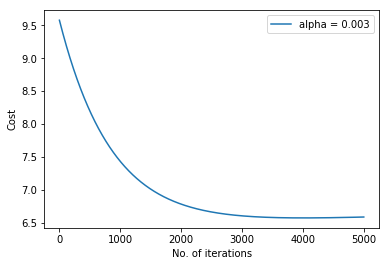

In [10]:
# Plotting the graph to see convergence
plt.plot(np.arange(5000),cost,label="alpha = 0.003")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()